<h1 style="font-size:15"<b><center> Considering Factors Affecting Voter Turnout for US Presidental Elections</center></b></h1>

The intent of this project is to consider voter turnout in light of various laws relating to election administration in the United States to measure whether certain laws affect voter turnout.


Intro: Voting and voting laws have been a very controversal topic in recent years. Some say various measures are necessary to promote and protect integrity of the votes that are cast and others say various laws can be prejudiced against people groups or demographics or discourage voter turnout. Despite the desired intent in a people-representing nation for all voices to be heard, the reality is that typical turnout for United States Presidential elections averages closer to 62% actual turnout considered in ratio to eligable voters (based on average data of the past four Presidential elections of 2008, 2012, 2016 and 2020). 


In an effort to understand this argument better as made on both sides, this project will showcase statistical analysis of several common voting rules to examine how these rules correlate to voter turnout. For example, does online voter registration increase or decrease voter turnout for elections? Or likewise, is requiring a photo identification in any way statistically correlated to higher or lower voter turnout?

In this project, because it seems logical that voting behavior could be influenced by the features of states (for example, maybe more people vote in Alabama vs. Alaska if the weather is better on election day, or maybe soft factors like "attitude towards voting" matter) this project will also consider individual states as variables for voter turnout.


<i>Null Hypothesis: Voting rules to NOT have an significant affect on voting turnout in US Presidential Elections.</i>

In [87]:
#Import Packages 
import pandas as pd
import numpy as np

#Sources: Balletpedia.org (election laws), Census.gov (voter turnout)
#Voting Data Given for Three Separate Presidential Elections, 2012, 2016 and 2020
#Purpose for analyzing data from three separate Presidenitial elections is to allow for 150 total data points
#which can provide meaningful statisical analysis of features and target variable. 

#Voting law data is interpreted as True if allowed or False if not allowed for that state 

#Gather Data

#2012_voting_Data:
US_States_2012 = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
online_voting_reg_2012 = [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
early_voting_2012 = [False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, False, False, True, True, False, False, True, False, True, True, True, True, False, False, False, True, False, False, False, False, False, True, True, True, True, False]
no_excuse_abs_2012 = [False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True] #putting false here if "early voting" only means dropping off absentee ballot. 
req_photo_id_2012 = [True, True, True, True, False, False, False, False, True, True, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, True, False, True, False] #Note: atm, putting True, even if *only* specified for "in-person election day" voting. 

voting_rate_2012 = [58.65, 60.64, 56.35, 52.46, 53.8, 62.59, 63.86, 65.61, 60, 42.52, 59.68, 60.11, 56.18, 68.56, 55.67, 59.51, 59.86, 69.92, 61.4, 65.35, 64.59, 74.16, 53.51, 61.59, 63.45, 61.69, 57.09, 70.31, 59.25, 54.8, 52.4, 64.57, 59.22, 64.55, 52.11, 66.85, 61.26, 58.77, 56.85, 58.69, 51.02, 51.1, 46.4, 64.66, 65.5, 62.46, 50.97, 68.33, 60.09, 50.65]

#Testing lengths of data as accuracy check of data carryover 
#print(len(online_voting_reg_2012))
#print(len(early_voting_2012))
#print(len(no_excuse_abs_2012))
#print(len(req_photo_id_2012))
#print(len(voting_rate_2012))

#2016_voting_Data:
US_States_2016 = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
online_voting_reg_2016 = [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, False]
early_voting_2016 = [False, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True] #putting False for DE since only AV's can use this feature
no_excuse_abs_2016 = [False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True] #putting false here if "early voting" only means dropping off absentee ballot. 
req_photo_id_2016 = [True, False, False, True, False, False, False, False, True, True, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, True, False, True, False] #Note: atm, putting True, even if *only* specified for "in-person election day" voting. 

voting_rate_2016 = [61.9, 58.4, 55.9, 53.3, 57.5, 70.4, 62.7, 67.3, 60.8, 61.9, 51.6, 63.9, 61.5, 59.3, 69.4, 63.3, 59.3, 66.3, 68.6, 65.1, 70.8, 66.8, 73.2, 74.5, 63.9, 65.7, 61.6, 57.9, 69.4, 61.9, 61.6, 58.7, 68.9, 63.9, 63.1, 52.4, 67.6, 61.6, 62.5, 64.7, 61, 55.7, 53.8, 57, 63.3, 66.9, 65.6, 47.8, 73.6, 58.9]

#Testing lengths of data as accuracy check of data carryover 
#print(len(online_voting_reg_2012))
#print(len(early_voting_2012))
#print(len(no_excuse_abs_2012))
#print(len(req_photo_id_2012))
#print(len(voting_rate_2012))


#2020_voting_Data
US_States_2020 = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
online_voting_reg_2020 = [True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, False]
early_voting_2020 = [False, True, True, True, True, True, False, False, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True] #putting False for DE since only AV's can use this feature
no_excuse_abs_2020 = [False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True] #putting false here if "early voting" only means dropping off absentee ballot. 
req_photo_id_2020 = [True, False, False, True, False, False, False, False, True, True, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, True, False, True, False] #Note: atm, putting True, even if *only* specified for "in-person election day" voting. 
voting_rate_2020 = [61.30, 60.70, 79.9, 54.00, 79.88, 78.33, 79.70, 68.86, 77.17, 66.20, 69.65, 81.20, 72.14, 65.00, 75.77, 63.90, 59.7, 69.49, 76.20, 74.63, 76.00, 71.00, 79.10, 60.40, 69.75, 81.33, 76.00, 78.22, 73.50, 72.00, 68.67, 69.70, 77.40, 62.65, 73.99, 54.40, 81.97, 70.93, 67.60, 73.88, 73.88, 68.60, 66.73, 90.09, 73.27, 74.60, 84.14, 56.40, 72.30, 62.60]

#Testing lengths of data as accuracy check of data carryover 
#print(len(online_voting_reg_2012))
#print(len(early_voting_2012))
#print(len(no_excuse_abs_2012))
#print(len(req_photo_id_2012))
#print(len(voting_rate_2012))

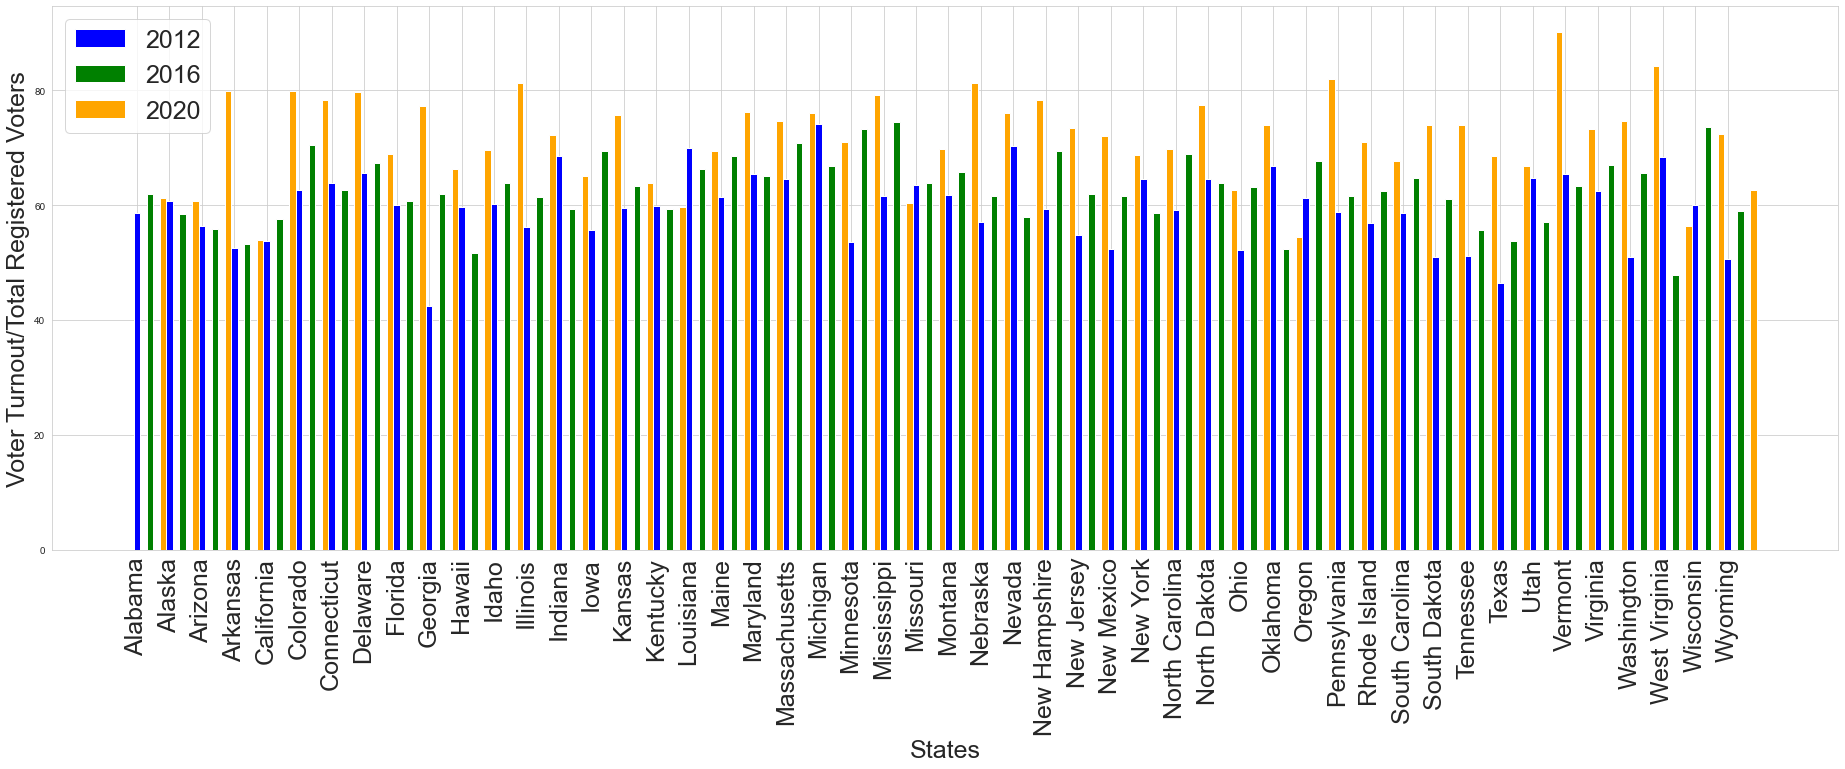

In [88]:
# Visualize the Data 

#Now producing bar graph of voter percentage turnout by election year per state, to help visualize differences

voting_rate_2012 = [58.65, 60.64, 56.35, 52.46, 53.8, 62.59, 63.86, 65.61, 60, 42.52, 59.68, 60.11, 56.18, 68.56, 55.67, 59.51, 59.86, 69.92, 61.4, 65.35, 64.59, 74.16, 53.51, 61.59, 63.45, 61.69, 57.09, 70.31, 59.25, 54.8, 52.4, 64.57, 59.22, 64.55, 52.11, 66.85, 61.26, 58.77, 56.85, 58.69, 51.02, 51.1, 46.4, 64.66, 65.5, 62.46, 50.97, 68.33, 60.09, 50.65]
voting_rate_2016 = [61.9, 58.4, 55.9, 53.3, 57.5, 70.4, 62.7, 67.3, 60.8, 61.9, 51.6, 63.9, 61.5, 59.3, 69.4, 63.3, 59.3, 66.3, 68.6, 65.1, 70.8, 66.8, 73.2, 74.5, 63.9, 65.7, 61.6, 57.9, 69.4, 61.9, 61.6, 58.7, 68.9, 63.9, 63.1, 52.4, 67.6, 61.6, 62.5, 64.7, 61, 55.7, 53.8, 57, 63.3, 66.9, 65.6, 47.8, 73.6, 58.9]
voting_rate_2020 = [61.30, 60.70, 79.9, 54.00, 79.88, 78.33, 79.70, 68.86, 77.17, 66.20, 69.65, 81.20, 72.14, 65.00, 75.77, 63.90, 59.7, 69.49, 76.20, 74.63, 76.00, 71.00, 79.10, 60.40, 69.75, 81.33, 76.00, 78.22, 73.50, 72.00, 68.67, 69.70, 77.40, 62.65, 73.99, 54.40, 81.97, 70.93, 67.60, 73.88, 73.88, 68.60, 66.73, 90.09, 73.27, 74.60, 84.14, 56.40, 72.30, 62.60]


States = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

import matplotlib.pyplot as plt
import numpy as np  

#X = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

X_axis = np.arange(len(States))
  
plt.bar(X_axis + 0.0, voting_rate_2012, 0.2, label = '2012', color = "blue")
plt.bar(X_axis + 0.4, voting_rate_2016, 0.2, label = '2016', color = "green")
plt.bar(X_axis + 0.8, voting_rate_2020, 0.2, label = '2020', color = "orange")
  
plt.xticks(X_axis, States)
plt.xlabel("States", fontsize = 25)
plt.ylabel("Voter Turnout/Total Registered Voters", fontsize = 25)
plt.xticks(rotation=90, fontsize = 25)
plt.legend(fontsize = 25)

from pylab import rcParams
rcParams['figure.figsize'] = 32,10
plt.show()


In [89]:
# Create Dataframe from 2012 Voter Data 

# This cell compiles individual lists of 2012 election data into a dataframe 
zipped_2012 = list(zip(US_States_2012, online_voting_reg_2012, early_voting_2012, no_excuse_abs_2012, req_photo_id_2012, voting_rate_2012))
df_2012 = pd.DataFrame(zipped_2012, columns=['US_States', 'Online_Reg', 'Early_Voting', 'No_Excuse_Absentee', 'Require_PhotoID', 'Voting_Rate'])
df_2012['Year'] = 2012
df_2012.head(20)

,US_States,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Voting_Rate,Year
0,Alabama,False,False,False,True,58.65,2012
1,Alaska,False,True,True,True,60.64,2012
2,Arizona,False,True,True,True,56.35,2012
3,Arkansas,False,True,True,True,52.46,2012
4,California,False,True,True,False,53.80,2012
5,Colorado,False,True,True,False,62.59,2012
6,Connecticut,False,False,False,False,63.86,2012
7,Delaware,False,False,True,False,65.61,2012
8,Florida,False,True,True,True,60.00,2012
9,Georgia,False,True,True,True,42.52,2012


In [90]:
# Create Dataframe from 2016 Voter Data 

#This cell compiles individual lists of 2016 election data into a dataframe 
zipped_2016 = list(zip(US_States_2016, online_voting_reg_2016, early_voting_2016, no_excuse_abs_2016, req_photo_id_2016, voting_rate_2016))
df_2016 = pd.DataFrame(zipped_2016, columns=['US_States', 'Online_Reg', 'Early_Voting', 'No_Excuse_Absentee', 'Require_PhotoID', 'Voting_Rate'])
#print(online_voting_reg_2016)
df_2016['Year'] = 2016
df_2016.head(20)
#set(df_2016["Online_Reg"])

,US_States,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Voting_Rate,Year
0,Alabama,True,False,False,True,61.9,2016
1,Alaska,True,True,True,False,58.4,2016
2,Arizona,True,True,True,False,55.9,2016
3,Arkansas,True,True,False,True,53.3,2016
4,California,True,True,True,False,57.5,2016
5,Colorado,True,True,True,False,70.4,2016
6,Connecticut,True,False,False,False,62.7,2016
7,Delaware,True,False,True,False,67.3,2016
8,Florida,True,True,True,True,60.8,2016
9,Georgia,True,True,True,True,61.9,2016


In [91]:
# Create Dataframe from 2020 Voter Data 

#This cell compiles individual lists of 2020 election data into a dataframe 
zipped_2020 = list(zip(US_States_2020, online_voting_reg_2020, early_voting_2020, no_excuse_abs_2020, req_photo_id_2020, voting_rate_2020))
df_2020 = pd.DataFrame(zipped_2020, columns=['US_States', 'Online_Reg', 'Early_Voting', 'No_Excuse_Absentee', 'Require_PhotoID', 'Voting_Rate'])
df_2020['Year'] = 2020
df_2020.head(20)

,US_States,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Voting_Rate,Year
0,Alabama,True,False,False,True,61.30,2020
1,Alaska,True,True,True,False,60.70,2020
2,Arizona,True,True,True,False,79.90,2020
3,Arkansas,False,True,False,True,54.00,2020
4,California,True,True,True,False,79.88,2020
5,Colorado,True,True,True,False,78.33,2020
6,Connecticut,True,False,False,False,79.70,2020
7,Delaware,True,False,True,False,68.86,2020
8,Florida,True,True,True,True,77.17,2020
9,Georgia,True,True,True,True,66.20,2020


In [92]:
# Concatenate all 2012, 2012, and 2020 dataframes into one joint dataframe 

dfs_concat_v = pd.concat([df_2012, df_2016, df_2020], axis=0, ignore_index = True)
dfs_concat_v

#reassign for name clarity 
df_pre_dummy = dfs_concat_v
set(df_pre_dummy["Online_Reg"])

{False, True}

In [7]:
# Check info on dataframe to confirm datatypes and length to confirm concatenation successful. 
#dfs_concat_v.info()

In [8]:
#dfs_concat_v.describe

This boxplot is a quick test of median value of (this feature).... 

,mean,std
Online_Reg,,
False,61.065217,7.329588
True,67.575679,8.112645


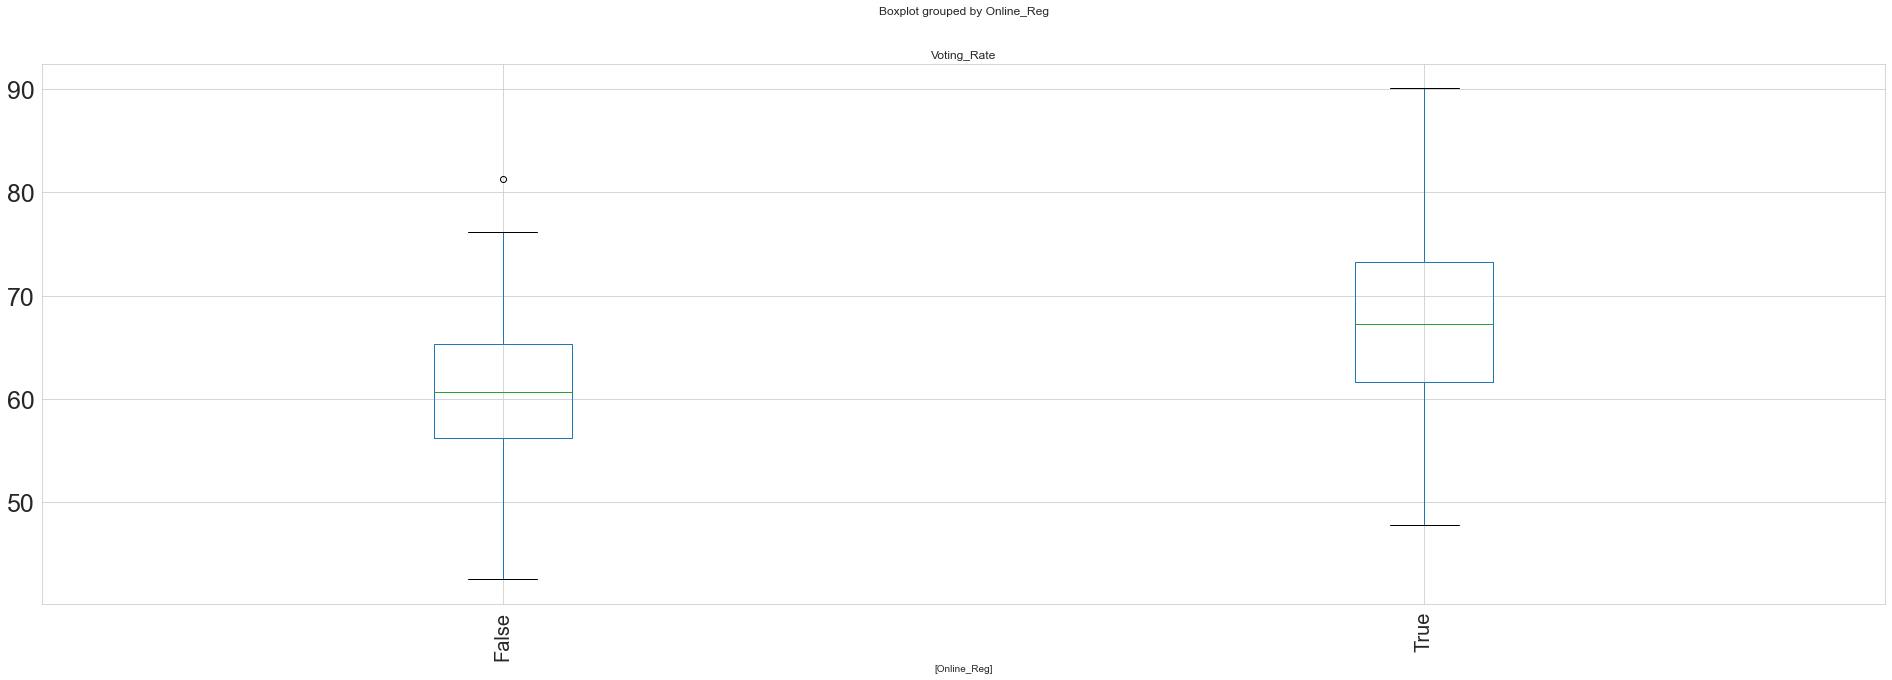

In [93]:
df_pre_dummy.boxplot(column=['Voting_Rate'],by = ['Online_Reg'], rot=90).set_yscale('linear')
#plt.ylabel("multiple") 


plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize = 25)


pd.DataFrame(df_pre_dummy.groupby( ['Online_Reg'])['Voting_Rate'].describe().loc[:,['mean','std']])


In [94]:
from scipy import stats
rng = np.random.default_rng()

In [95]:
rvs1 = df_pre_dummy[df_pre_dummy["Online_Reg"]==True]["Voting_Rate"]
rvs2 = df_pre_dummy[df_pre_dummy["Online_Reg"]==False]["Voting_Rate"]
stats.ttest_ind(rvs1, rvs2)
#print(std.rvs1)
#print(std.rvs2)
#mean value usually 
#Alpha set to 95% 
#mean value and see if significant 
#p_Value
#difference of means is 5 standard deviation... 

#t test: 
    
    #sampes are independent 
    #dist is normal 
    #and then p value and relate to alpha. 

Ttest_indResult(statistic=5.11943095883277, pvalue=9.387632177186671e-07)

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

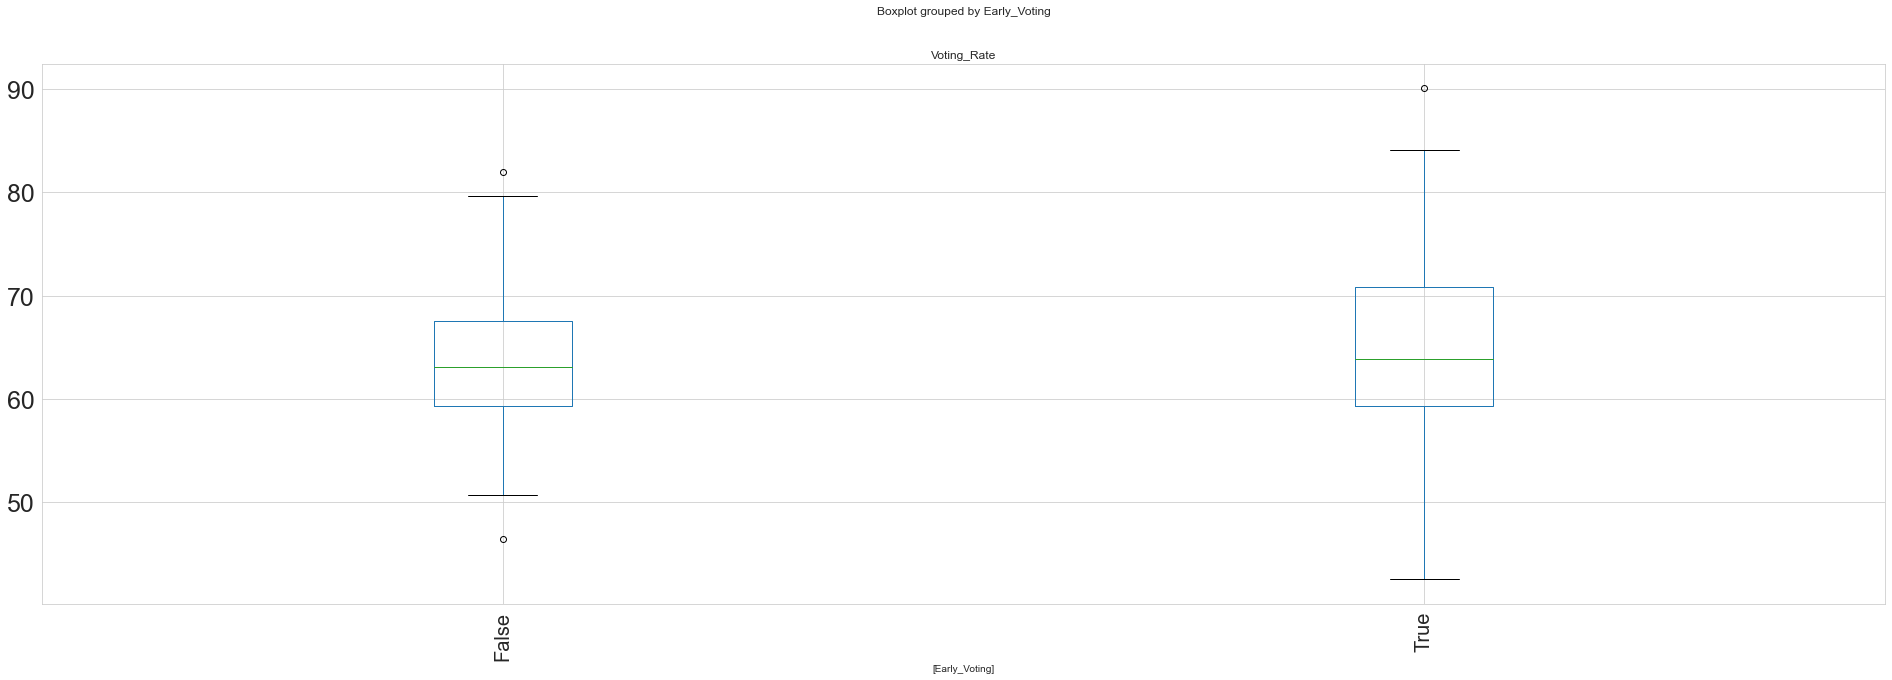

In [99]:
df_pre_dummy.boxplot(column=['Voting_Rate'],by = ['Early_Voting'], rot=90).set_yscale('linear')
#plt.ylabel("multiple") 
pd.DataFrame(df_pre_dummy.groupby( ['Early_Voting'])['Voting_Rate'].describe().loc[:,['mean','std']])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize = 25)
#Add ticks marks to box plots... info 


In [100]:
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=5.11943095883277, pvalue=9.387632177186671e-07)

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

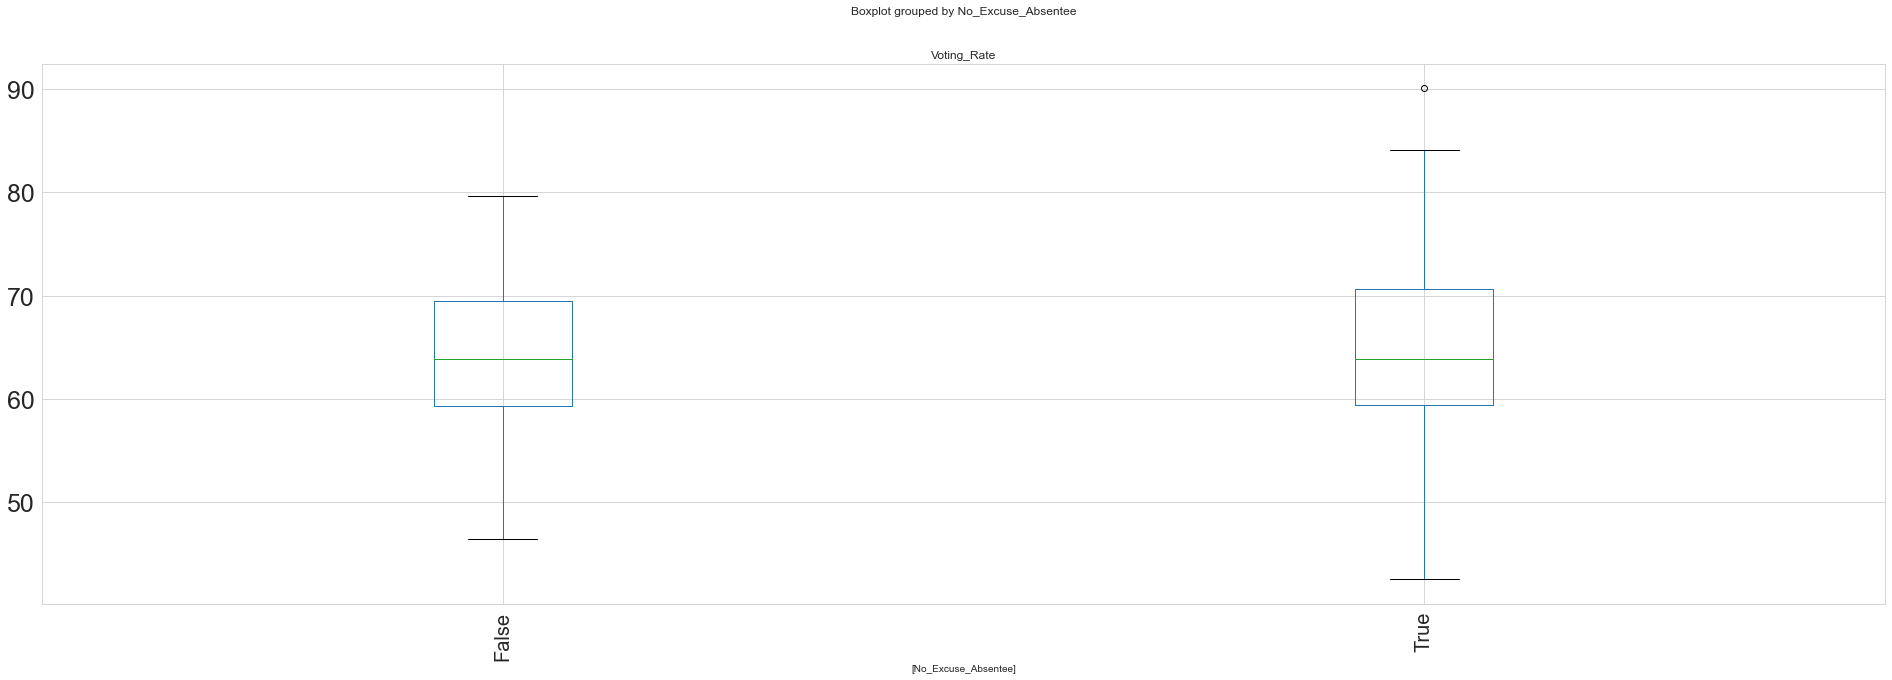

In [102]:
df_pre_dummy.boxplot(column=['Voting_Rate'],by = ['No_Excuse_Absentee'], rot=90).set_yscale('linear')
#plt.ylabel("multiple") 
pd.DataFrame(df_pre_dummy.groupby( ['No_Excuse_Absentee'])['Voting_Rate'].describe().loc[:,['mean','std']])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize = 25)


(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

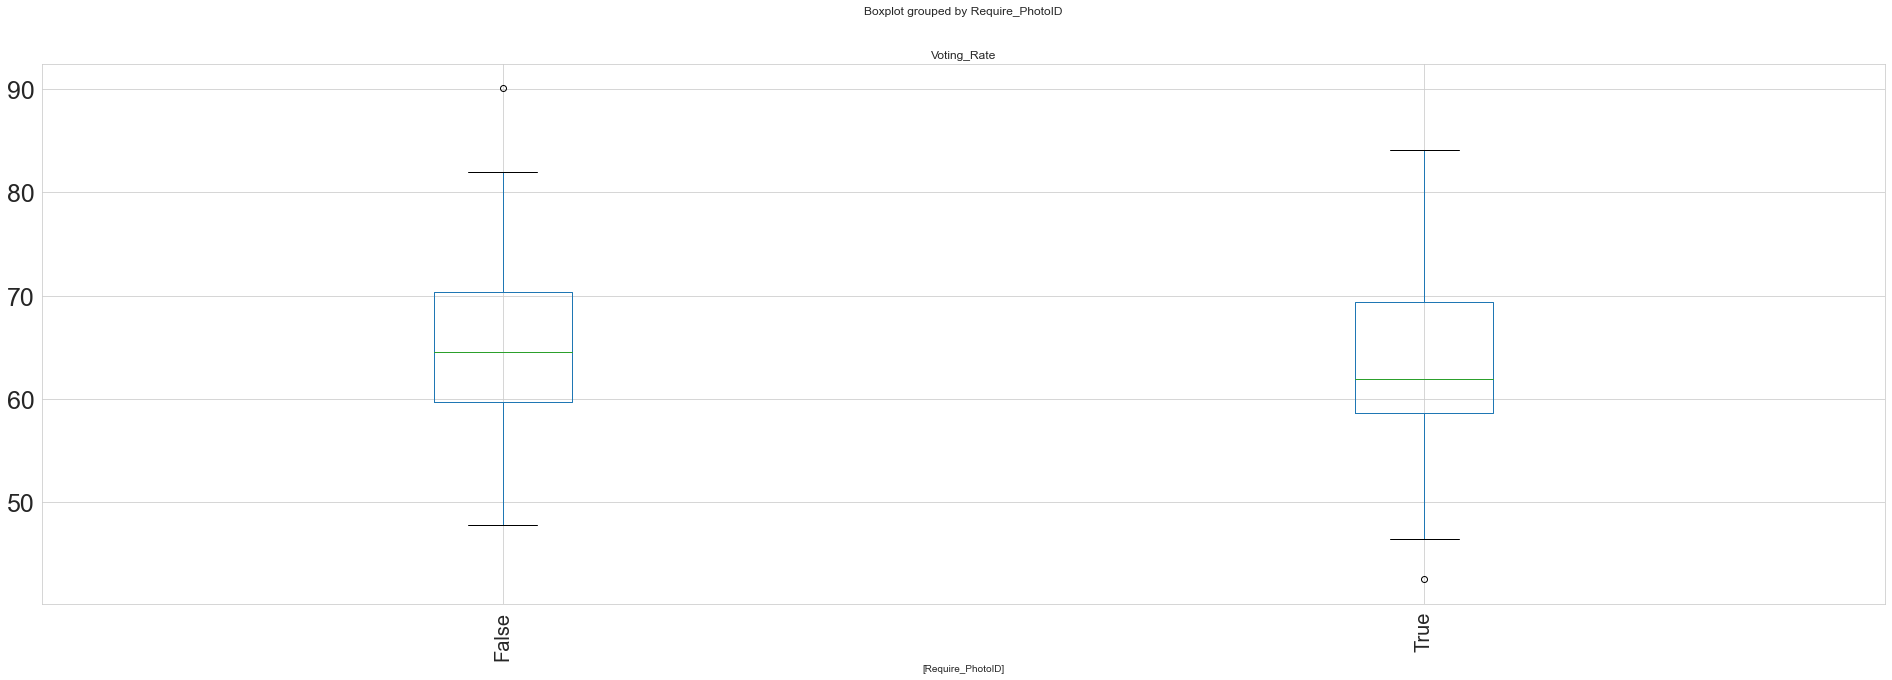

In [103]:
df_pre_dummy.boxplot(column=['Voting_Rate'],by = ['Require_PhotoID'], rot=90).set_yscale('linear')
#plt.ylabel("multiple") 
pd.DataFrame(df_pre_dummy.groupby( ['Require_PhotoID'])['Voting_Rate'].describe().loc[:,['mean','std']])
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize = 25)


,Online_Reg
Online_Reg,
False,69
True,81


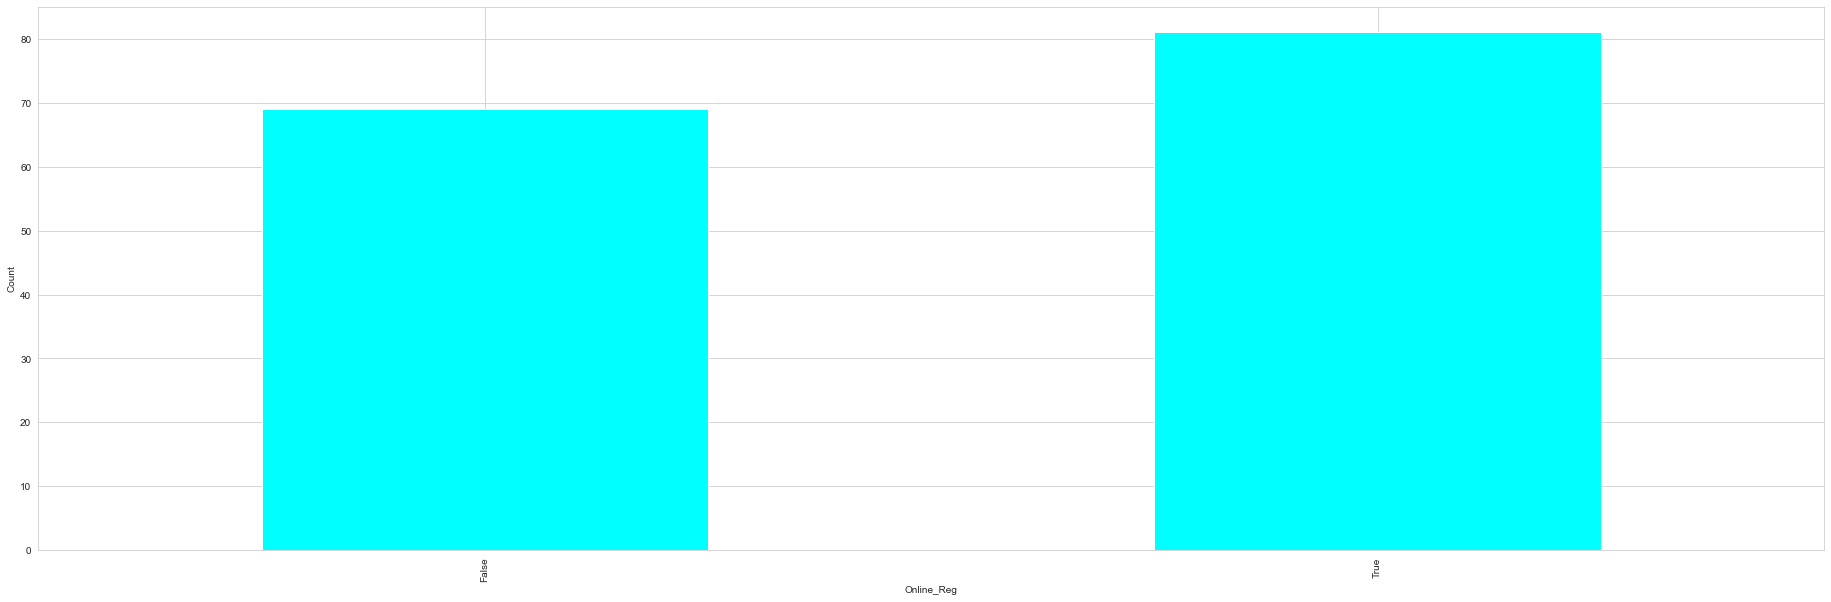

In [104]:
import matplotlib.pyplot as plt
df_pre_dummy.groupby(['Online_Reg'])['Online_Reg'].count().plot(kind='bar', color = "cyan").set_ylabel('Count')
df_pre_dummy.groupby(['Online_Reg' ])[['Online_Reg']].count()

,Early_Voting
Early_Voting,
False,42
True,108


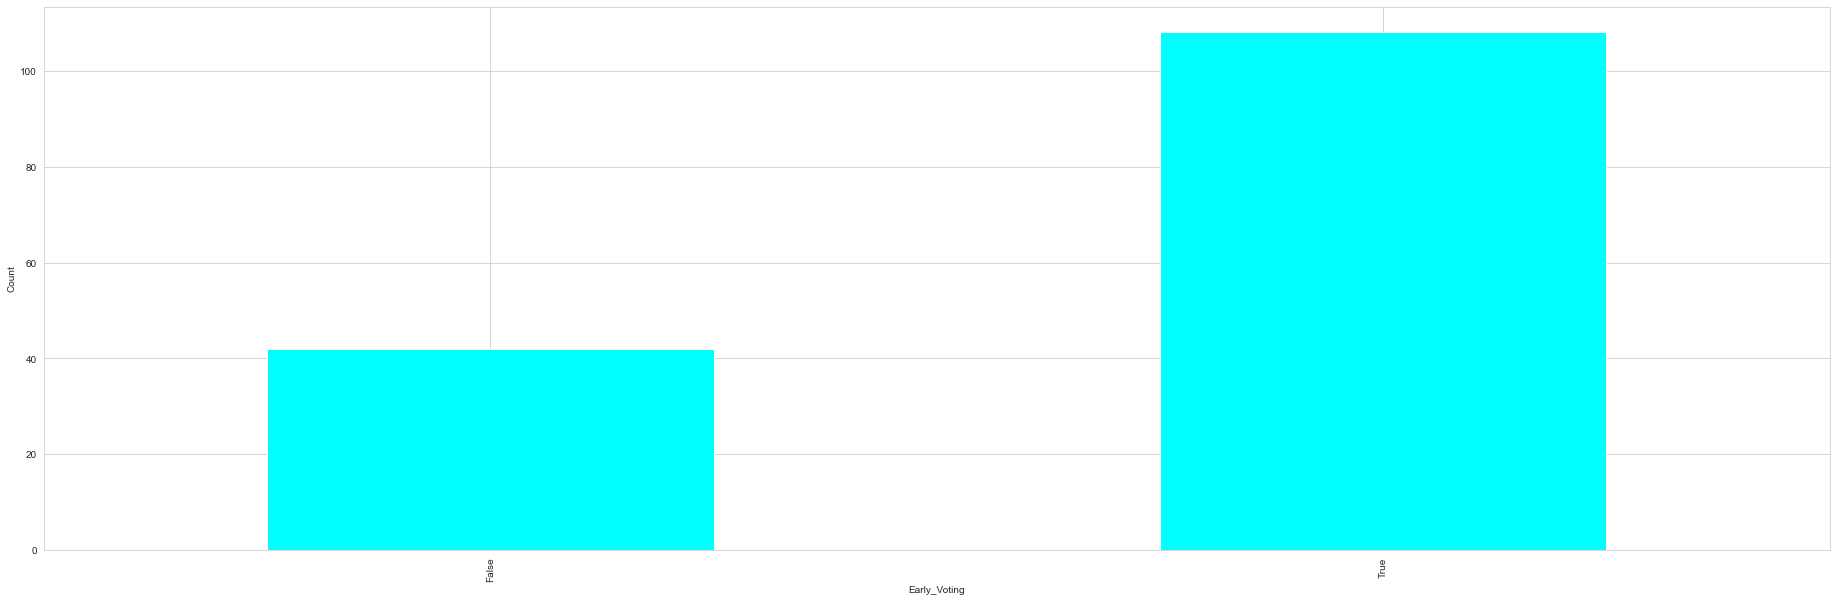

In [105]:
df_pre_dummy.groupby(['Early_Voting'])['Early_Voting'].count().plot(kind='bar', color= "cyan").set_ylabel('Count')
df_pre_dummy.groupby(['Early_Voting' ])[['Early_Voting']].count()

,No_Excuse_Absentee
No_Excuse_Absentee,
False,47
True,103


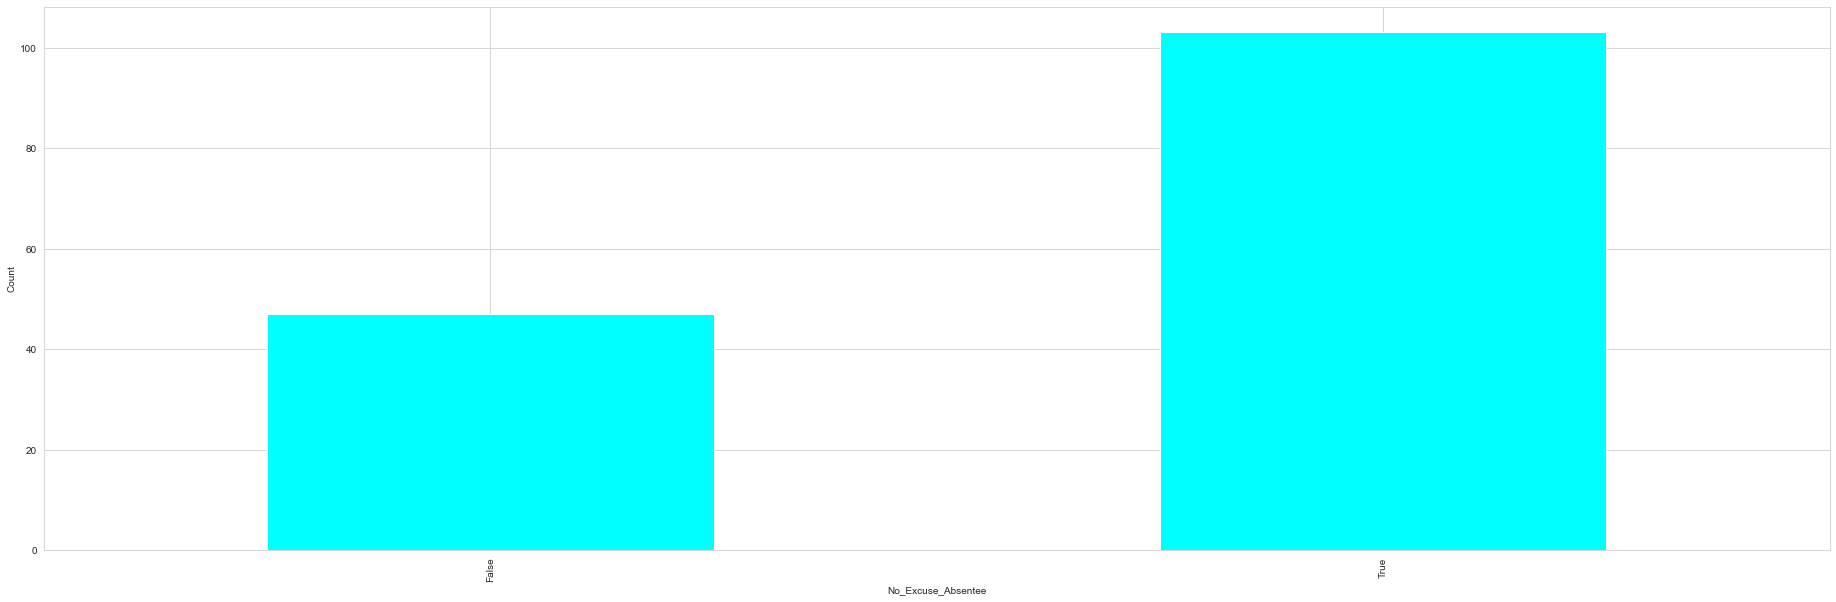

In [106]:
df_pre_dummy.groupby(['No_Excuse_Absentee'])['No_Excuse_Absentee'].count().plot(kind='bar', color = "cyan").set_ylabel('Count')
df_pre_dummy.groupby(['No_Excuse_Absentee'])[['No_Excuse_Absentee']].count()

,Require_PhotoID
Require_PhotoID,
False,97
True,53


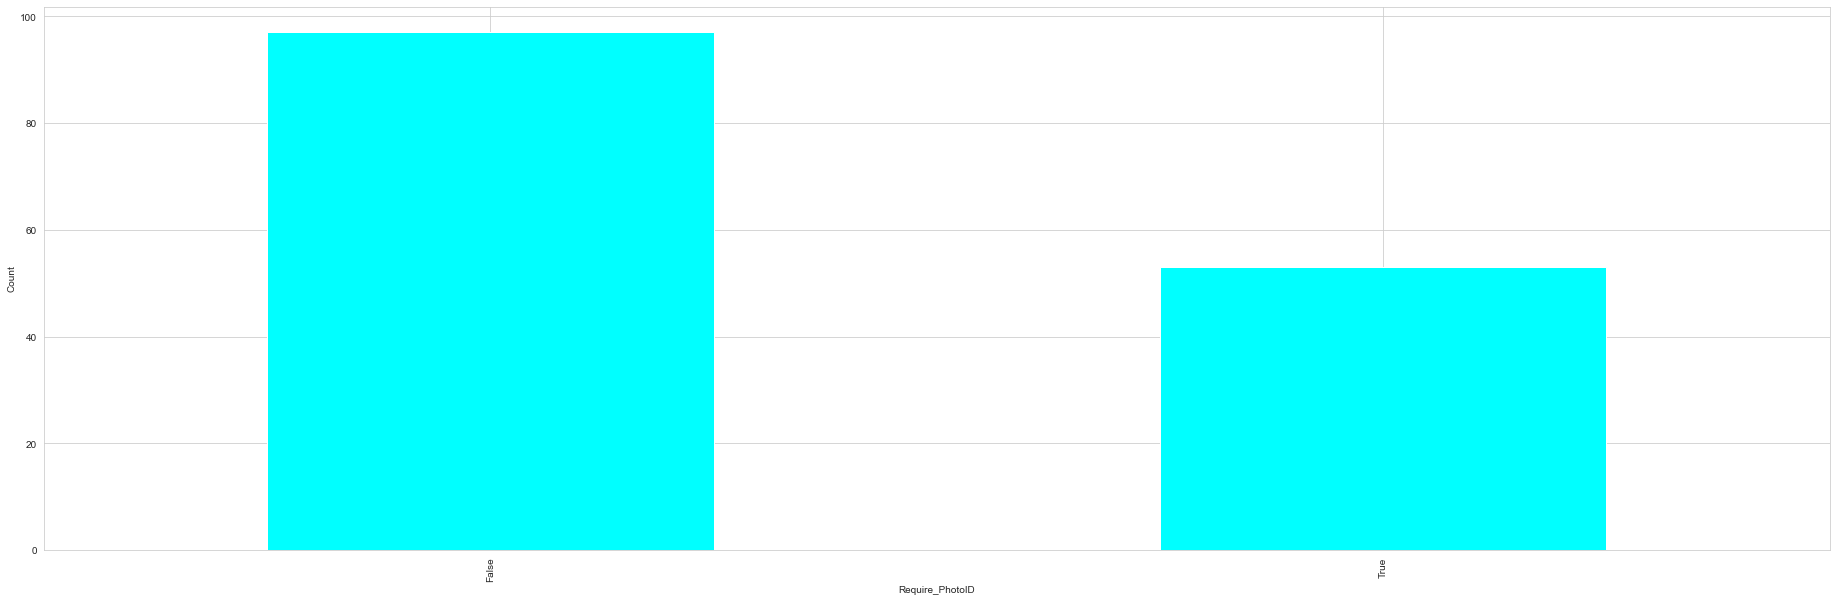

In [107]:
df_pre_dummy.groupby(['Require_PhotoID'])['Require_PhotoID'].count().plot(kind='bar', color = "cyan").set_ylabel('Count')
df_pre_dummy.groupby(['Require_PhotoID'])[['Require_PhotoID']].count()

Convert States to Dummy Variables using pd.get_dummies 

Here I convert individual state names to dummy variables, assuming that states themselves due to inherent qualtities could play role in voter turnout 

This will transform my previous six (6) columns into fifty-six (56) columns with each State now being indivudually annotated for consideration in upcoming feature analysis 

In [108]:
dfs_with_dummies = pd.get_dummies(df_pre_dummy)
dfs_with_dummies.head(10)

,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Voting_Rate,Year,US_States_Alabama,US_States_Alaska,US_States_Arizona,US_States_Arkansas,...,US_States_South Dakota,US_States_Tennessee,US_States_Texas,US_States_Utah,US_States_Vermont,US_States_Virginia,US_States_Washington,US_States_West Virginia,US_States_Wisconsin,US_States_Wyoming
0,False,False,False,True,58.65,2012,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,True,True,True,60.64,2012,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,True,True,True,56.35,2012,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,False,True,True,True,52.46,2012,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,False,True,True,False,53.80,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,False,True,True,False,62.59,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,False,False,False,False,63.86,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,False,False,True,False,65.61,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,False,True,True,True,60.00,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,False,True,True,True,42.52,2012,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
dfs_with_dummies.describe()

#When more than 2 categories, will do nova test... so compounding affect of ... basically regression... same as p value from that 

,Voting_Rate,Year,US_States_Alabama,US_States_Alaska,US_States_Arizona,US_States_Arkansas,US_States_California,US_States_Colorado,US_States_Connecticut,US_States_Delaware,...,US_States_South Dakota,US_States_Tennessee,US_States_Texas,US_States_Utah,US_States_Vermont,US_States_Virginia,US_States_Washington,US_States_West Virginia,US_States_Wisconsin,US_States_Wyoming
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,64.580867,2016.000000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,...,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000
std,8.393694,3.276928,0.140469,0.140469,0.140469,0.140469,0.140469,0.140469,0.140469,0.140469,...,0.140469,0.140469,0.140469,0.140469,0.140469,0.140469,0.140469,0.140469,0.140469,0.140469
min,42.520000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.262500,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.880000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.737500,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.090000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [221]:
# Check new DataFrame to ensure States were converted to Dummy Variables 

#dfs_with_dummies.info()

In [110]:
from sklearn import tree
X = dfs_with_dummies.drop(columns = ['Voting_Rate'], axis = 1)
y = dfs_with_dummies['Voting_Rate']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
X_train.head()

,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Year,US_States_Alabama,US_States_Alaska,US_States_Arizona,US_States_Arkansas,US_States_California,...,US_States_South Dakota,US_States_Tennessee,US_States_Texas,US_States_Utah,US_States_Vermont,US_States_Virginia,US_States_Washington,US_States_West Virginia,US_States_Wisconsin,US_States_Wyoming
118,False,True,True,False,2020,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,False,True,True,False,2012,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,True,True,False,2012,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45,False,True,True,False,2012,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59,True,True,True,True,2016,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X.head()

,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Year,US_States_Alabama,US_States_Alaska,US_States_Arizona,US_States_Arkansas,US_States_California,...,US_States_South Dakota,US_States_Tennessee,US_States_Texas,US_States_Utah,US_States_Vermont,US_States_Virginia,US_States_Washington,US_States_West Virginia,US_States_Wisconsin,US_States_Wyoming
0,False,False,False,True,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,True,True,True,2012,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,True,True,True,2012,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,True,True,True,2012,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,False,True,True,False,2012,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# NOW performing Grid Search for Best Fit Paramester for Model on 
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

def performance_metric1(y_true, y_predict):
    
    #   Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score
#  Import 'r2_score'
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X_train, y_train):
    
    # Create cross-validation sets from the training data

    cv_sets = ShuffleSplit(n_splits = 2, train_size = 0.80, random_state = 0)
 
    #  Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 1)

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    
    params = {'max_depth':range(1,25)}


    scoring_fnc = make_scorer(performance_metric1)

   
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    print(y_train.shape)
    print(X_train.shape)
    grid = grid.fit(X_train, y_train)
 
    return grid 


reg = fit_model(X_train, y_train)
reg

(105,)
(105, 55)


GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=0, test_size=None, train_size=0.8),
             estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 25)},
             scoring=make_scorer(performance_metric1))

In [108]:
#x_train.info()

In [50]:
reg.best_estimator_

DecisionTreeRegressor(max_depth=13, random_state=1)

In [51]:
reg.cv_results_

{'mean_fit_time': array([0.00623858, 0.00382388, 0.00237656, 0.00236094, 0.00209653,
        0.00224996, 0.00238335, 0.00222158, 0.00226653, 0.00226402,
        0.00209808, 0.00266898, 0.00255597, 0.00249612, 0.00253463,
        0.00263143, 0.002437  , 0.0028733 , 0.00266957, 0.00227141,
        0.00239146, 0.00296843, 0.00365758, 0.00254309]),
 'std_fit_time': array([2.95460224e-03, 5.99026680e-04, 1.32560730e-04, 4.89950180e-05,
        3.63588333e-05, 1.85966492e-04, 2.13384628e-05, 1.38521194e-04,
        1.31130219e-06, 1.62124634e-04, 2.14576721e-06, 2.05874443e-04,
        3.59177589e-04, 2.64048576e-04, 3.71456146e-04, 3.95774841e-05,
        7.30752945e-05, 5.16533852e-04, 4.45365906e-04, 4.64916229e-05,
        1.35540962e-04, 6.77466393e-04, 3.05175781e-05, 1.83224678e-04]),
 'mean_score_time': array([0.00239539, 0.00211108, 0.00152588, 0.00145698, 0.00180554,
        0.00134957, 0.001562  , 0.00130451, 0.0013634 , 0.0012995 ,
        0.00132155, 0.00156128, 0.00137103, 0.00

In [52]:
mean_scores = reg.cv_results_["mean_test_score"]
mean_scores

#average all of these and get one number

array([0.33628066, 0.34328085, 0.31378454, 0.33111977, 0.32228825,
       0.30840835, 0.30669304, 0.32698363, 0.33460652, 0.34645091,
       0.36720699, 0.37296669, 0.40422045, 0.3419173 , 0.35027405,
       0.40149265, 0.38662682, 0.29836479, 0.29891343, 0.31772326,
       0.29674812, 0.39727138, 0.37148872, 0.3850771 ])

In [53]:
import statistics
avg_all_scores = statistics.mean(mean_scores)

avg_all_scores
#move this above 

0.344174510881228

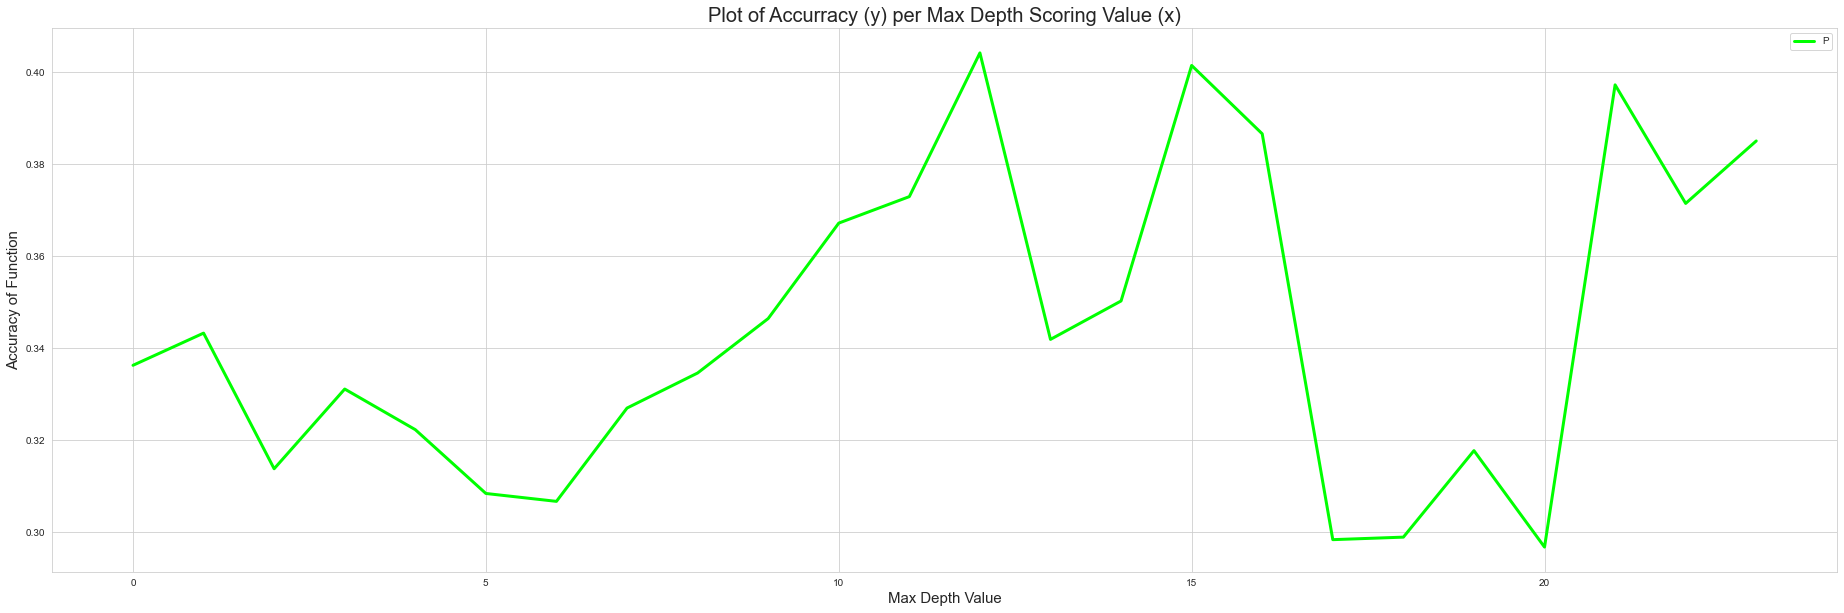

In [54]:
plt.plot(reg.cv_results_["mean_test_score"], linestyle = 'solid', color =  "lime", linewidth=3)
#plt.set_facecolor("black")
plt.rcParams["figure.figsize"] = (20,6)
plt.legend("Plot of Max Depth")
plt.xlabel('Max Depth Value', fontsize = 15)
plt.ylabel('Accuracy of Function', fontsize = 15)
plt.title("Plot of Accurracy (y) per Max Depth Scoring Value (x)", fontsize = 20)
plt.show()

In [55]:
clf = DecisionTreeRegressor(max_depth = 13)
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
r2_score(y_train, clf.predict(X_train))

0.9530612117431564

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, clf.predict(X_test))

0.32939884412502085

In [58]:
plot_list = list(zip(clf.feature_importances_, X_train.columns))
plot_list
#Plot top importances and discuss 

#Bar plot 
#Only plot significant values
#type(plot_list)

[(0.019954926823983744, 'Online_Reg'),
 (0.005044429451753764, 'Early_Voting'),
 (0.017407833612513125, 'No_Excuse_Absentee'),
 (0.0393804644718163, 'Require_PhotoID'),
 (0.3973190519549791, 'Year'),
 (0.008265590980808464, 'US_States_Alabama'),
 (0.02057968424018178, 'US_States_Alaska'),
 (0.010154760635035228, 'US_States_Arizona'),
 (0.0, 'US_States_Arkansas'),
 (0.0, 'US_States_California'),
 (0.005513791571952607, 'US_States_Colorado'),
 (1.2358244843808437e-05, 'US_States_Connecticut'),
 (0.01576510177963798, 'US_States_Delaware'),
 (0.0, 'US_States_Florida'),
 (0.04413320554519345, 'US_States_Georgia'),
 (0.021796463139822805, 'US_States_Hawaii'),
 (0.021786633038891223, 'US_States_Idaho'),
 (0.0, 'US_States_Illinois'),
 (0.0182859151972697, 'US_States_Indiana'),
 (0.0035221559525781755, 'US_States_Iowa'),
 (0.004814202747554759, 'US_States_Kansas'),
 (0.019527904012684276, 'US_States_Kentucky'),
 (0.0, 'US_States_Louisiana'),
 (0.014686131376467168, 'US_States_Maine'),
 (0.0, 'U

In [59]:
#def my_funct(i,j)
for i, j in plot_list:
    if i > 0.005:
        print(i, j)  
#print(my_funct)

0.019954926823983744 Online_Reg
0.005044429451753764 Early_Voting
0.017407833612513125 No_Excuse_Absentee
0.0393804644718163 Require_PhotoID
0.3973190519549791 Year
0.008265590980808464 US_States_Alabama
0.02057968424018178 US_States_Alaska
0.010154760635035228 US_States_Arizona
0.005513791571952607 US_States_Colorado
0.01576510177963798 US_States_Delaware
0.04413320554519345 US_States_Georgia
0.021796463139822805 US_States_Hawaii
0.021786633038891223 US_States_Idaho
0.0182859151972697 US_States_Indiana
0.019527904012684276 US_States_Kentucky
0.014686131376467168 US_States_Maine
0.005876589066592909 US_States_Massachusetts
0.031501734399827196 US_States_Michigan
0.02310703270800603 US_States_Minnesota
0.00550438174468628 US_States_Missouri
0.01833323456601187 US_States_Nevada
0.011401897732172483 US_States_New Mexico
0.005516733462056088 US_States_Ohio
0.02038493784013248 US_States_Oklahoma
0.007258797860257693 US_States_Oregon
0.013681992983190712 US_States_South Dakota
0.006753097978

In [597]:
#dfs_with_dummies.columns

In [244]:
#from scipy.stats import pearsonr
#corr, p_value = pearsonr(X.Require_PhotoID, X.Voting_Rate)
#corr
#corr,p_value

In [60]:
from scipy import stats

rvs1 = dfs_with_dummies[dfs_with_dummies['Online_Reg']== True]['Voting_Rate']
rvs2 = dfs_with_dummies[dfs_with_dummies['Online_Reg']== False]['Voting_Rate']
stats.ttest_ind(rvs1, rvs2)

#Check if missing value / booleanpvalue=9.387632177186671e-07

Ttest_indResult(statistic=5.11943095883277, pvalue=9.387632177186671e-07)

In [438]:
#print(type(X_test))

In [61]:
print(rvs1)

50     61.90
51     58.40
52     55.90
53     53.30
54     57.50
       ...  
144    73.27
145    74.60
146    84.14
147    56.40
148    72.30
Name: Voting_Rate, Length: 81, dtype: float64


In [439]:
#print(type(X_train))

In [62]:
print(rvs2)

0      58.65
1      60.64
2      56.35
3      52.46
4      53.80
       ...  
133    62.65
135    54.40
140    73.88
142    66.73
149    62.60
Name: Voting_Rate, Length: 69, dtype: float64


In [63]:
r2_score(y_train, clf.predict(X_train))

0.9530612117431564

In [443]:
'''x_train = X[(X.Year==2012) | (X.Year==2016)]

y_train = dfs_with_dummies[(dfs_with_dummies.Year==2012) | (dfs_with_dummies.Year==2016)]["Voting_Rate"]

x_test = X[X.Year==2020]

y_test = dfs_with_dummies[dfs_with_dummies.Year==2020]["Voting_Rate"]'''

'x_train = X[(X.Year==2012) | (X.Year==2016)]\n\ny_train = dfs_with_dummies[(dfs_with_dummies.Year==2012) | (dfs_with_dummies.Year==2016)]["Voting_Rate"]\n\nx_test = X[X.Year==2020]\n\ny_test = dfs_with_dummies[dfs_with_dummies.Year==2020]["Voting_Rate"]'

In [67]:
X_test.head()

,Online_Reg,Early_Voting,No_Excuse_Absentee,Require_PhotoID,Year,US_States_Alabama,US_States_Alaska,US_States_Arizona,US_States_Arkansas,US_States_California,...,US_States_South Dakota,US_States_Tennessee,US_States_Texas,US_States_Utah,US_States_Vermont,US_States_Virginia,US_States_Washington,US_States_West Virginia,US_States_Wisconsin,US_States_Wyoming
14,False,True,True,False,2012,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,True,True,True,True,2016,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
75,False,True,True,False,2016,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,False,False,False,False,2012,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,True,True,False,False,2020,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
r2_score(y_test, clf.predict(X_test))

0.32939884412502085

In [69]:
r2_score(y_train, clf.predict(X_train))

0.9530612117431564

In [70]:
feature_importance = dict(zip(X_train.columns, clf.feature_importances_))
feature_importance

{'Online_Reg': 0.019954926823983744,
 'Early_Voting': 0.005044429451753764,
 'No_Excuse_Absentee': 0.017407833612513125,
 'Require_PhotoID': 0.0393804644718163,
 'Year': 0.3973190519549791,
 'US_States_Alabama': 0.008265590980808464,
 'US_States_Alaska': 0.02057968424018178,
 'US_States_Arizona': 0.010154760635035228,
 'US_States_Arkansas': 0.0,
 'US_States_California': 0.0,
 'US_States_Colorado': 0.005513791571952607,
 'US_States_Connecticut': 1.2358244843808437e-05,
 'US_States_Delaware': 0.01576510177963798,
 'US_States_Florida': 0.0,
 'US_States_Georgia': 0.04413320554519345,
 'US_States_Hawaii': 0.021796463139822805,
 'US_States_Idaho': 0.021786633038891223,
 'US_States_Illinois': 0.0,
 'US_States_Indiana': 0.0182859151972697,
 'US_States_Iowa': 0.0035221559525781755,
 'US_States_Kansas': 0.004814202747554759,
 'US_States_Kentucky': 0.019527904012684276,
 'US_States_Louisiana': 0.0,
 'US_States_Maine': 0.014686131376467168,
 'US_States_Maryland': 0.0,
 'US_States_Massachusetts': 0

In [71]:
sorted_features = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse = True)}

In [72]:
list(sorted_features)[0:10]

['Year',
 'US_States_Utah',
 'US_States_West Virginia',
 'US_States_Georgia',
 'Require_PhotoID',
 'US_States_Michigan',
 'US_States_Minnesota',
 'US_States_Hawaii',
 'US_States_Idaho',
 'US_States_Alaska']

In [73]:
features_list = []
importances_list = []
#my_dict = {}

for x in list(sorted_features)[0:10]:
    
    features_list.append(x)
    importances_list.append(sorted_features[x])

In [74]:
features_list, importances_list
    

(['Year',
  'US_States_Utah',
  'US_States_West Virginia',
  'US_States_Georgia',
  'Require_PhotoID',
  'US_States_Michigan',
  'US_States_Minnesota',
  'US_States_Hawaii',
  'US_States_Idaho',
  'US_States_Alaska'],
 [0.3973190519549791,
  0.0704829755566956,
  0.06617329109130089,
  0.04413320554519345,
  0.0393804644718163,
  0.031501734399827196,
  0.02310703270800603,
  0.021796463139822805,
  0.021786633038891223,
  0.02057968424018178])

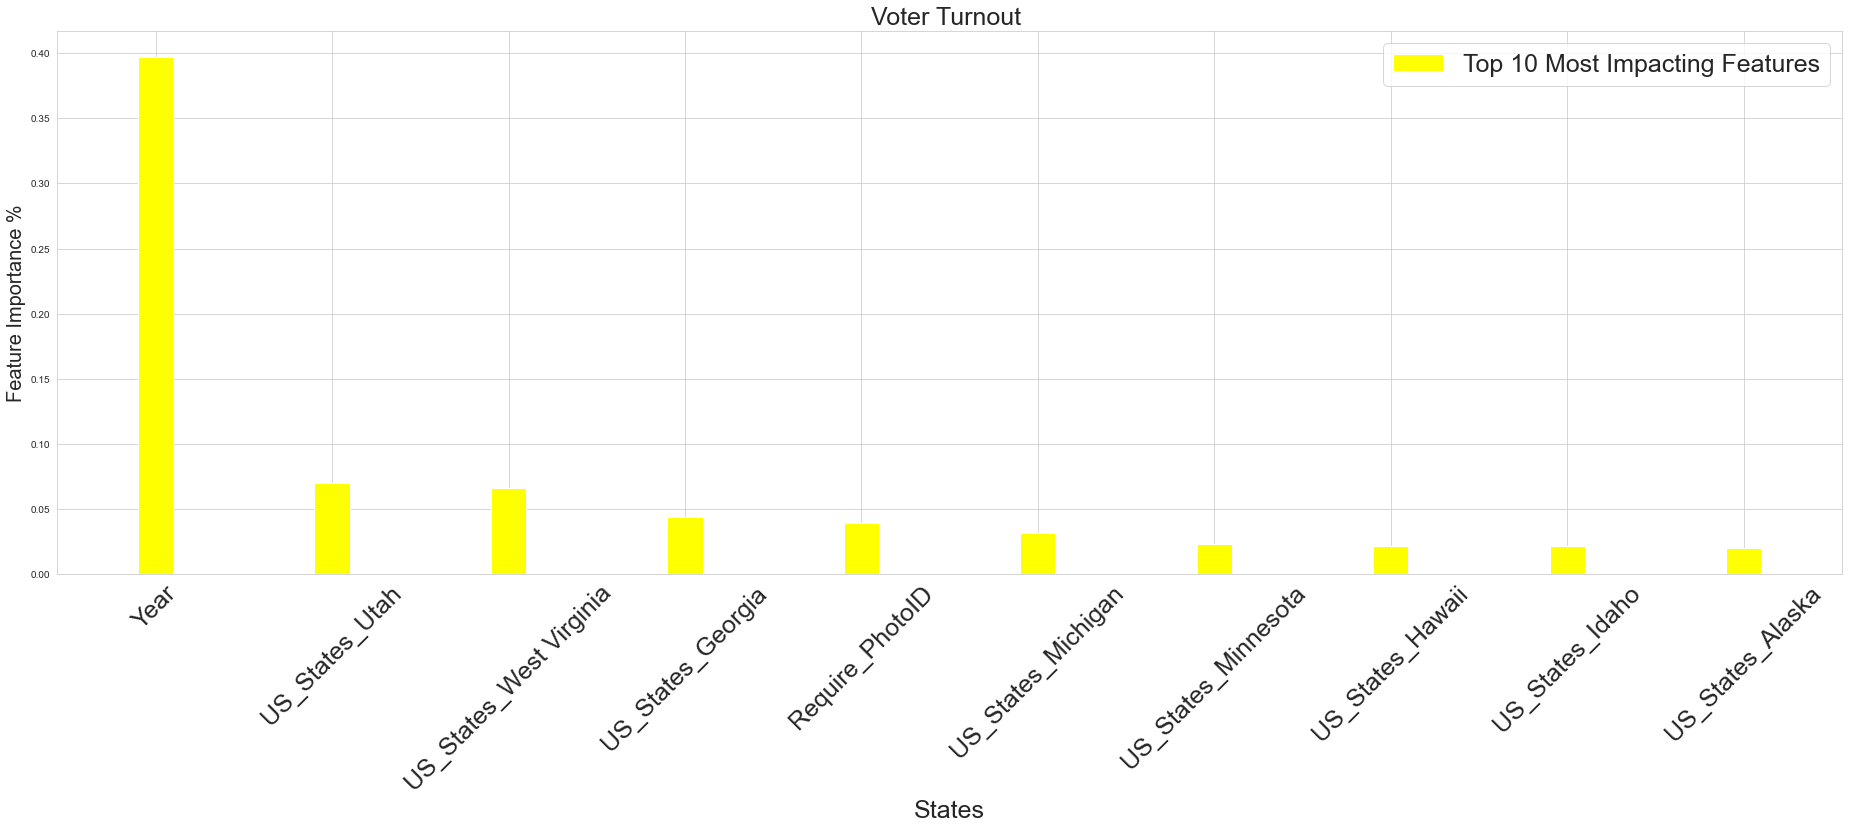

In [76]:
#top ten correlated features

X = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

X_axis = np.arange(len(features_list))
  
plt.bar(X_axis + 0.0, importances_list, 0.2, label = 'Top 10 Most Impacting Features', color = "yellow")
#plt.bar(X_axis + 0.4, voting_rate_2016, 0.2, label = '2016', color = "green")
#plt.bar(X_axis + 0.8, voting_rate_2020, 0.2, label = '2020', color = "orange")
  
plt.xticks(X_axis, features_list, fontsize = 20)
plt.xlabel("States", fontsize = 25)
plt.ylabel("Feature Importance %", fontsize = 20)
plt.title("Voter Turnout ", fontsize = 25)
plt.xticks(rotation=45, fontsize = 25)
plt.legend(fontsize = 25)

from pylab import rcParams
rcParams['figure.figsize'] = 32,10
plt.show()


In [198]:
#End